In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor


In [4]:
train_data = datasets.MNIST(
    root= 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root= 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [8]:
train_data.targets.size()

torch.Size([60000])

In [9]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [10]:
from torch.utils.data import DataLoader
loaders = {
    'train': DataLoader(train_data, 
                        batch_size =100,
                        shuffle=True,
                        num_workers=1),

    'test': DataLoader(test_data, 
                        batch_size =100,
                        shuffle=True,
                        num_workers=1),
}

In [17]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):  # Fixed: double underscores __init__
        super(CNN, self).__init__()  # Fixed: double underscores __init__
        
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)  # Fixed: conv1 (not convl)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    
    def forward(self, x):  # Fixed: Proper indentation (was inside __init__)
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)  # Changed to log_softmax with dim

In [23]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)  # Fixed: This line was outside the for loop
            test_loss += loss_fn(output, target).item() 
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()  # Fixed: Added parentheses

    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%)\n')

In [24]:
for epoch in range(1,11):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	2.313523
Train Epoch: 1 [2000/60000 (3%)]	2.239030
Train Epoch: 1 [4000/60000 (7%)]	1.805943
Train Epoch: 1 [6000/60000 (10%)]	1.268602
Train Epoch: 1 [8000/60000 (13%)]	1.048662
Train Epoch: 1 [10000/60000 (17%)]	0.654941
Train Epoch: 1 [12000/60000 (20%)]	0.755468
Train Epoch: 1 [14000/60000 (23%)]	0.597054
Train Epoch: 1 [16000/60000 (27%)]	1.105385
Train Epoch: 1 [18000/60000 (30%)]	0.690815
Train Epoch: 1 [20000/60000 (33%)]	0.450239
Train Epoch: 1 [22000/60000 (37%)]	0.437897
Train Epoch: 1 [24000/60000 (40%)]	0.585592
Train Epoch: 1 [26000/60000 (43%)]	0.304900
Train Epoch: 1 [28000/60000 (47%)]	0.688248
Train Epoch: 1 [30000/60000 (50%)]	0.471923
Train Epoch: 1 [32000/60000 (53%)]	0.433749
Train Epoch: 1 [34000/60000 (57%)]	0.549591
Train Epoch: 1 [36000/60000 (60%)]	0.524508
Train Epoch: 1 [38000/60000 (63%)]	0.423702
Train Epoch: 1 [40000/60000 (67%)]	0.271852
Train Epoch: 1 [42000/60000 (70%)]	0.325661
Train Epoch: 1 [44000/60000 (73%)]	0.416983

In [26]:
device

device(type='cpu')

Prediction: {prediction}


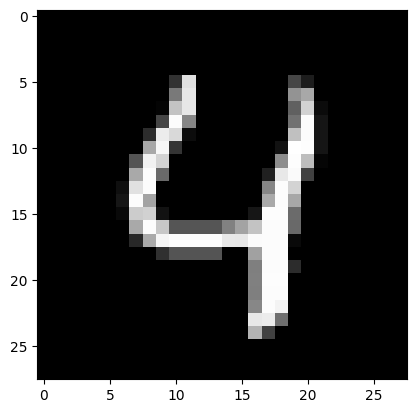

In [34]:
import matplotlib.pyplot as plt
model.eval()

data,target = test_data[4] #modify this to get different results

data = data.unsqueeze(0).to(device)

output = model(data)
prediction = output.argmax(dim =1, keepdim= True).item()

print('Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()
